### Will a patient have a 10 year risk of developing a cardio vascular diseases?

The `framingham.csv` file contains medical data from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts, who participated in cardiovascular disease prevention trials. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD). The set contains 15 attributes that combine the sociological and medical characteristics of the respondents, such as age, gender, body mass index, blood sugar concentration and others. Each attribute is a potential risk factor. It is necessary to make a classifier that can predict the occurrence of heart problems based on these data. Information on the occurrence of subjects' heart problems was recorded at the level of the TenYearCHD attribute.

In [201]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [202]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix

**Question 1:** Load the data contained in the `framingham.csv` file. 

In [203]:
df = pd.read_csv('framingham.csv')

**Question 2:** Print the shape of the data, type of the data and first 3 rows. 

In [204]:
# Shape of data
df.shape

(4238, 16)

In [205]:
# Type of data
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [206]:
#First 3 rows of the data
df.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


**Question 3:** Check for duplicates and missing values in the data. Drop all rows that contain at least one missing value. Check again the shape of your data.

In [207]:
# Duplicates 
df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
4233    False
4234    False
4235    False
4236    False
4237    False
Length: 4238, dtype: bool

In [208]:
df.duplicated().sum()

0

In [209]:
df.isnull()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4234,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4235,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [210]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [211]:
# Drop rows with missing values 
df = df.dropna(0)

/tmp/ipykernel_3262/2825040364.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna(0)


In [212]:
df.shape

(3656, 16)

**Question 4:** Check which features are correlated with each other and with the outcome variable `TenYearCHD`. Create a `seaborn` correlation heatmap. 

In [213]:
# Features correlation
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024387,0.017677,0.206778,0.331243,-0.052128,-0.002308,0.000806,0.013833,-0.070229,-0.045484,0.051575,0.072867,-0.114923,0.003048,0.091745
age,-0.024387,1.000000,-0.158961,-0.210862,-0.189099,0.134670,0.050864,0.306693,0.109027,0.267764,0.388551,0.208880,0.137172,-0.002685,0.118245,0.233810
education,0.017677,-0.158961,1.000000,0.025253,0.013527,-0.013647,-0.030353,-0.079100,-0.039547,-0.012956,-0.124511,-0.058502,-0.137280,-0.064254,-0.031874,-0.063068
currentSmoker,0.206778,-0.210862,0.025253,1.000000,0.773819,-0.051936,-0.038159,-0.107561,-0.041859,-0.051119,-0.134371,-0.115748,-0.159574,0.050452,-0.053346,0.019176
cigsPerDay,0.331243,-0.189099,0.013527,0.773819,1.000000,-0.046479,-0.036283,-0.069890,-0.036934,-0.030222,-0.094764,-0.056650,-0.086888,0.063549,-0.053803,0.052159
BPMeds,-0.052128,0.134670,-0.013647,-0.051936,-0.046479,1.000000,0.113119,0.263047,0.049051,0.094011,0.271291,0.199750,0.105603,0.012894,0.054210,0.089116
prevalentStroke,-0.002308,0.050864,-0.030353,-0.038159,-0.036283,0.113119,1.000000,0.066098,0.009619,0.012697,0.061080,0.055878,0.036478,-0.017020,0.016051,0.048351
prevalentHyp,0.000806,0.306693,-0.079100,-0.107561,-0.069890,0.263047,0.066098,1.000000,0.080623,0.167074,0.697790,0.617634,0.302917,0.147333,0.087129,0.181556
diabetes,0.013833,0.109027,-0.039547,-0.041859,-0.036934,0.049051,0.009619,0.080623,1.000000,0.048371,0.102574,0.050767,0.088970,0.060996,0.614817,0.093397
totChol,-0.070229,0.267764,-0.012956,-0.051119,-0.030222,0.094011,0.012697,0.167074,0.048371,1.000000,0.220130,0.174986,0.120799,0.093057,0.049749,0.091127


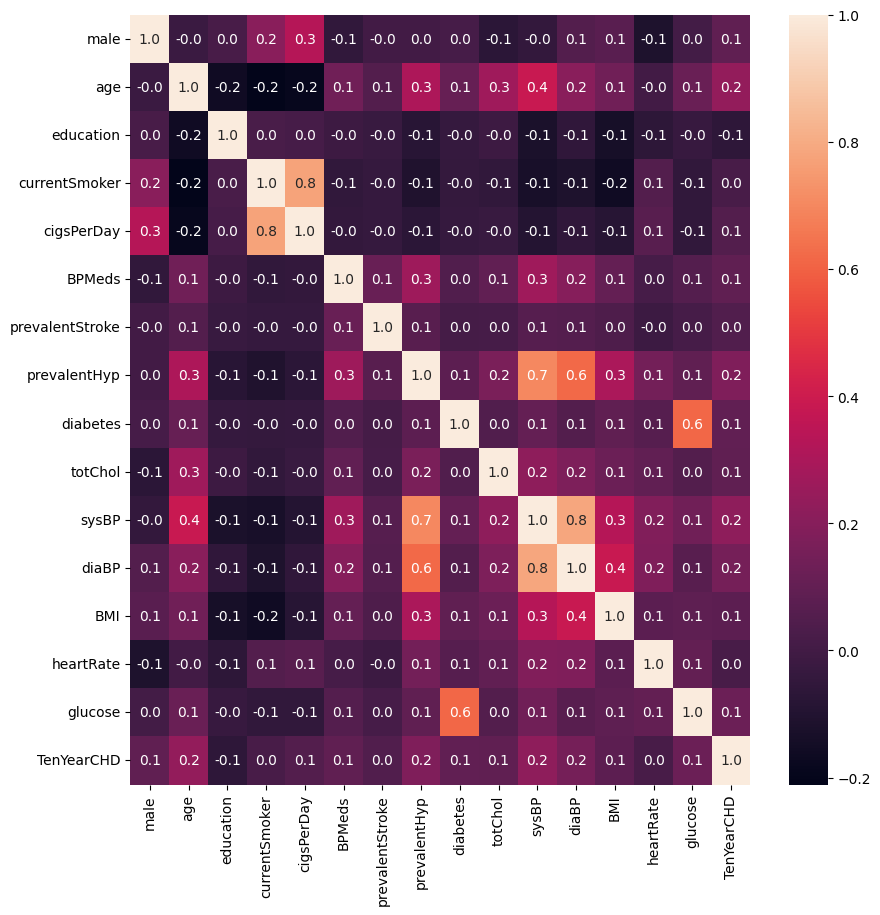

In [214]:
# Heat map of features correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.1f')
plt.show()

In [215]:
# Feature correlation with target
df.corr()['TenYearCHD']

male               0.091745
age                0.233810
education         -0.063068
currentSmoker      0.019176
cigsPerDay         0.052159
BPMeds             0.089116
prevalentStroke    0.048351
prevalentHyp       0.181556
diabetes           0.093397
totChol            0.091127
sysBP              0.222885
diaBP              0.150342
BMI                0.081931
heartRate          0.020523
glucose            0.121942
TenYearCHD         1.000000
Name: TenYearCHD, dtype: float64

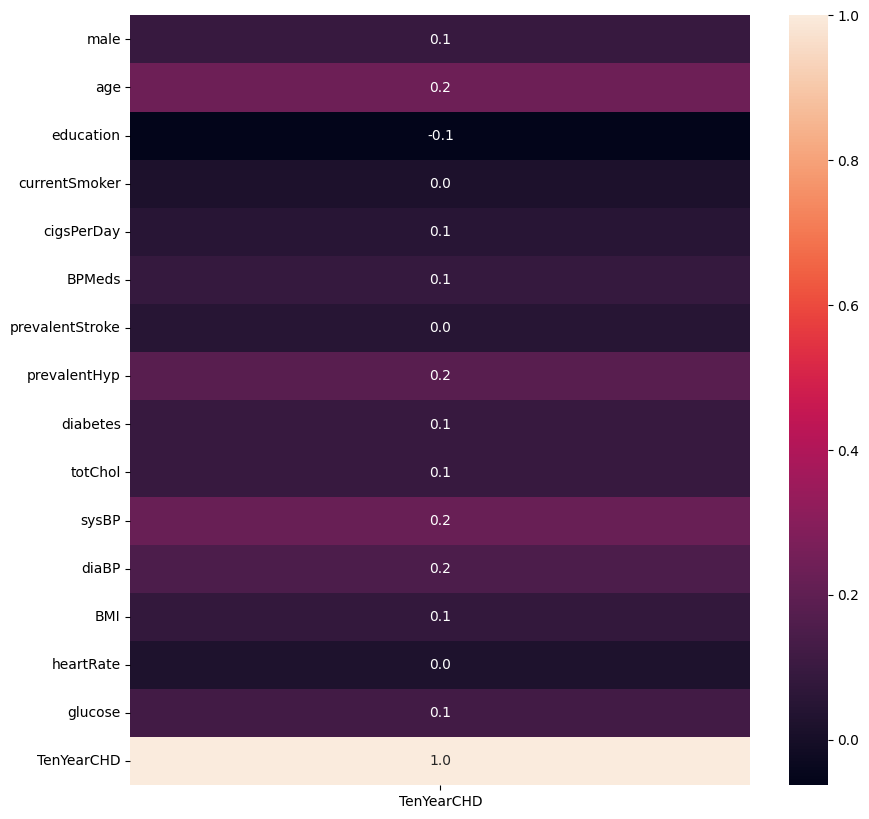

In [216]:
# Heat map of feature correlation with target
plt.figure(figsize=(10,10))
sns.heatmap(df.corr()[['TenYearCHD']], annot=True, fmt='.1f')
plt.show()

**Question 5:** What can we conclude based on the obtained `Heatmap` in **Question 4**? Which column can be dropped from the data? Explain your reasoning. Afterwards, drop the column you find irrelevant.

*From the heatmap of the correlation between the features and the target, we can conclude that the features which have no correlated with the 
target, and so wont influence in our target, are: education, currentSmoker, prevalentStroke and heartRate.*

In [217]:
# Drop features with no correlation with target
df = df.drop(['education', 'currentSmoker', 'prevalentStroke', 'heartRate'], axis=1)

**Question 6:** Show a bar chart comparing proportion of male and female patients, i.e., show the patient statistics by gender.

<AxesSubplot: xlabel='male', ylabel='count'>

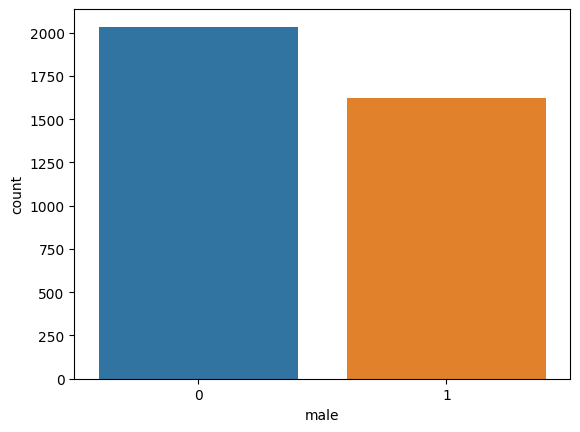

In [218]:
# Barchart male and female
sns.countplot(data=df, x = 'male')

**Question 7:** Identify the features with the most importance for the outcome variable `TenYearCHD`. Apply `SelectKBest` class to extract top $10$ most impactful features for the target variable. Visualize the selected features by using `bar chart` and create a new dataframe, named `data_ten`, with selected features. Note that you should have a dataframe with $11$ columns!

In [219]:
# Order features by correlation with target
df.corr()['TenYearCHD'].sort_values(ascending=False)


TenYearCHD      1.000000
age             0.233810
sysBP           0.222885
prevalentHyp    0.181556
diaBP           0.150342
glucose         0.121942
diabetes        0.093397
male            0.091745
totChol         0.091127
BPMeds          0.089116
BMI             0.081931
cigsPerDay      0.052159
Name: TenYearCHD, dtype: float64

In [220]:
relev_f = df.corr()['TenYearCHD'].sort_values(ascending=False)

In [221]:
# Chose top 11 features
relev_f.index[0:11]

Index(['TenYearCHD', 'age', 'sysBP', 'prevalentHyp', 'diaBP', 'glucose',
       'diabetes', 'male', 'totChol', 'BPMeds', 'BMI'],
      dtype='object')

In [222]:
relev_f = relev_f.index[0:11]

<AxesSubplot: ylabel='count'>

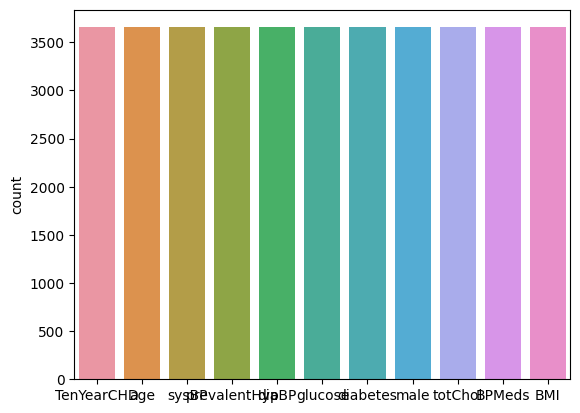

In [223]:
# Barchart of top 11 features
sns.countplot(data=df[relev_f])

In [224]:
data_ten = df[relev_f]

In [225]:
data_ten.head(3)

,TenYearCHD,age,sysBP,prevalentHyp,diaBP,glucose,diabetes,male,totChol,BPMeds,BMI
0,0,39,106.0,0,70.0,77.0,0,1,195.0,0.0,26.97
1,0,46,121.0,0,81.0,76.0,0,0,250.0,0.0,28.73
2,0,48,127.5,0,80.0,70.0,0,1,245.0,0.0,25.34


**Question 8:** Since we want to try out different models we need to scale our features. Do this in the following line by using the `MinMaxScaler`. 

In [226]:
# Scaling features
scaler = MinMaxScaler()
scaling = scaler.fit_transform(data_ten)
scaling_df = pd.DataFrame(scaling, columns=data_ten.columns)
data_ten.append(scaling_df, ignore_index=True)

/tmp/ipykernel_3262/1051729552.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_ten.append(scaling_df, ignore_index=True)


,TenYearCHD,age,sysBP,prevalentHyp,diaBP,glucose,diabetes,male,totChol,BPMeds,BMI
0,0.0,39.000000,106.000000,0.0,70.000000,77.000000,0.0,1.0,195.000000,0.0,26.970000
1,0.0,46.000000,121.000000,0.0,81.000000,76.000000,0.0,0.0,250.000000,0.0,28.730000
2,0.0,48.000000,127.500000,0.0,80.000000,70.000000,0.0,1.0,245.000000,0.0,25.340000
3,1.0,61.000000,150.000000,1.0,95.000000,103.000000,0.0,0.0,225.000000,0.0,28.580000
4,0.0,46.000000,130.000000,0.0,84.000000,85.000000,0.0,0.0,285.000000,0.0,23.100000
...,...,...,...,...,...,...,...,...,...,...,...
7307,0.0,0.684211,0.271868,1.0,0.349206,0.115819,0.0,1.0,0.151951,0.0,0.228308
7308,1.0,0.947368,0.399527,1.0,0.518519,0.110169,0.0,1.0,0.129363,0.0,0.184198
7309,1.0,0.473684,0.451537,1.0,0.465608,0.129944,0.0,1.0,0.410678,0.0,0.252787
7310,0.0,0.500000,0.203310,0.0,0.338624,0.079096,0.0,1.0,0.193018,0.0,0.101066


**Question 9:** Extract the value of the target variable `TenYearCHD`, which predicts the possibility of disease in the next $10$  years, and then divide the data into a training set and a test set in the ratio $4:1$. When dividing the data, take into account the stratification. Explain shortly, in words, why the stratification is important. Set the `random_state` parameter to  $5$.

In [227]:
data_ten.head(3)

,TenYearCHD,age,sysBP,prevalentHyp,diaBP,glucose,diabetes,male,totChol,BPMeds,BMI
0,0,39,106.0,0,70.0,77.0,0,1,195.0,0.0,26.97
1,0,46,121.0,0,81.0,76.0,0,0,250.0,0.0,28.73
2,0,48,127.5,0,80.0,70.0,0,1,245.0,0.0,25.34


In [228]:
# Value target variable
y = data_ten['TenYearCHD'].values

In [229]:
x = data_ten.drop(['TenYearCHD'], axis=1)

In [230]:
# Divide data in train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size= 0.25,stratify=y ,random_state=5)

*The parameter stratisfy in model.train_test_split() is used to balance an inbalance distribution. If we don't use this parameter, the model will be trained on a skewed dataset, which will lead to a biased model.*

**Question 10:** In the previous notebook, we have already explained and tested different `linear regression` models. Choose one of the linear regression models and train it on the data prepared in the previous step, if possible. Now do the same with the `Logistic Regression` model, i.e., create and train a `logistic regression` model with weights $1$  and $4$  that, respectively, correspond to classes $0$ and $1$. 
- What can you conclude based on the obtained results with the two models? Are both of them suitable? Shortly explain your reasoning. 
- Take now the default setting in your `Logistic Regression` model. What do you observe?
- What does the `F1` score tell you in this case?

In [231]:
# Linear regression model
linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [232]:
# Logistic regression model 
log = linear_model.LogisticRegression(class_weight={0:1, 1:4})
log.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 1, 1: 4})

In [233]:
linear.coef_

array([ 7.05918722e-03,  2.53808218e-03,  1.15893025e-02, -1.08277660e-03,
        1.00188914e-03, -2.05359183e-02,  7.51563055e-02, -1.71527916e-05,
        2.55600890e-02,  1.86283812e-03])

In [234]:
linear.intercept_

-0.6078679527388635

In [235]:
log.coef_

array([[ 0.05100394,  0.00511427,  0.99774908, -0.02243323, -0.00160354,
         0.29779778,  0.47515708, -0.00157598,  0.2332318 , -0.02578828]])

In [236]:
log.intercept_

array([-1.20133215])

*With the results between the two models, we can see that the values either from the coeficient and from the intercept are double in the 
regression model than in the linear. With this resault we can assume that the logistic regression model is more suitable for this case.*

In [237]:
# Default setting in logistic regression model
log.get_params()


{'C': 1.0,
 'class_weight': {0: 1, 1: 4},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

*From the default settings we can see that the maximum number of iterations is 100, and the penalty is l2.*

In [262]:
# F1 score linear regression
y_pred = linear.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)       #Prediction gives values between 0 and 1 
metrics.f1_score(y_test, y_pred)

0.028368794326241138

In [261]:
#F1 score logistic regression
metrics.f1_score(y_test, log.predict(X_test))

0.36

*F1-score tells us that the regression model is not good enough to predict the outcome variable. The F1-score is 0.4, which is not a good score and so it is not good enough to predict the outcome variable.*

**Question 11:** Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e., one class label has a very high number of observations and the other has a very low number of observations.
- Is there a class imbalance in our case? Has the dataset been split evenly by class? Use the `value_counts` function.
- Visualize the classes by using the `countplot` function inside of `seaborn`.

In [240]:
# Count of classes in target variable
data_ten['TenYearCHD'].value_counts()

0    3099
1     557
Name: TenYearCHD, dtype: int64

*Clearly, there is a class imbalance in our dataset. However when splitting the data, the dataset has been split evenly by class.*

<AxesSubplot: xlabel='TenYearCHD', ylabel='count'>

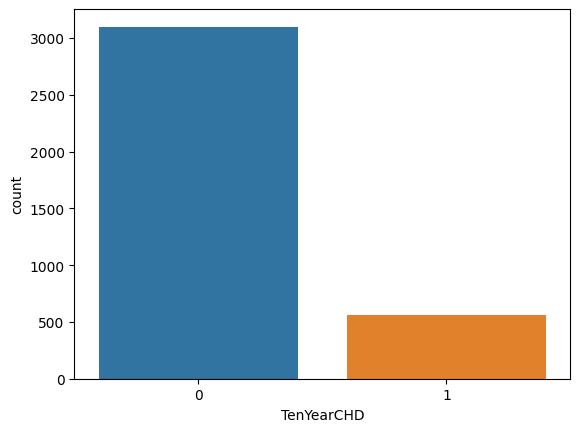

In [241]:
# Visualize the count of classes in target variable
sns.countplot(data=data_ten, x = 'TenYearCHD')

There are different techniques that can be used to handle imbalanced datasets:
- Use the right evaluation metrics that take class imbalance into account 
- Resample the training set 
- Use K-fold Cross-Validation 
- Ensemble Different Resampled Datasets$\dots$

In this notebook we will consider the method of resampling, more specifically, data undersampling or oversampling (or both), which will allow us to obtain the equal number of instances from both the majority and minority class. 

**Question 12:** Interesting results may be achieved by combining both oversampling and undersampling. This can result in improved overall performance compared to performing one or the other techniques alone. In order to combine oversampling we will use [SMOTETomek](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTETomek.html#imblearn.combine.SMOTETomek) which combines the oversampling technique [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) and undersampling technique [TomekLinks](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html).

- Explain in words what the advantage of combining both over- and under-sampling could be, compared to using one of them individually. 
- Perform the combination of over- and under-sampling by using `SMOTETomek`. Afterwards, save the obtained dataset as a `DataFrame` called **data_new**. 
- Visualize the classes again by using the `countplot` function.

In [242]:
# First time uncomment this line and install imblearn
#!pip3 install -U imbalanced-learn
from imblearn.combine import SMOTETomek

*The advantages of combining under and over sampling is that we will get a balanced dataset, as under sampling will remove some of the majority class and over sampling will add some of the minority class.*

In [243]:
#SMOTETomek
smt = SMOTETomek(random_state=42)
balance = smt.fit_resample(x, y)
data_new = balance[0]
target_new = balance[1]

In [244]:
data_new["TenYearCHD"] = target_new

In [245]:
data_new.head(3)

,age,sysBP,prevalentHyp,diaBP,glucose,diabetes,male,totChol,BPMeds,BMI,TenYearCHD
0,39,106.0,0,70.0,77.0,0,1,195.0,0.0,26.97,0
1,46,121.0,0,81.0,76.0,0,0,250.0,0.0,28.73,0
2,48,127.5,0,80.0,70.0,0,1,245.0,0.0,25.34,0


In [246]:
data_new.shape

(6116, 11)

<AxesSubplot: xlabel='TenYearCHD', ylabel='count'>

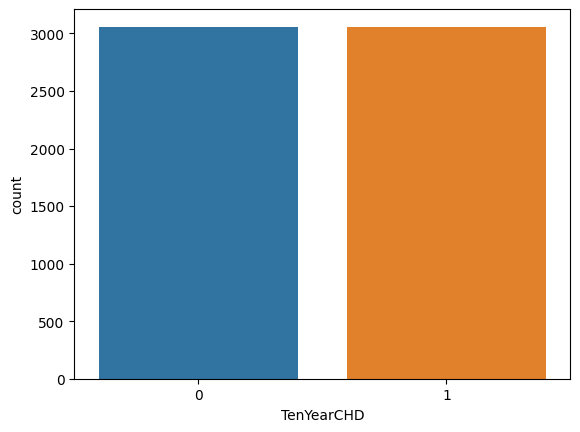

In [247]:
sns.countplot(data = data_new, x = 'TenYearCHD')

*Now we have a balanced dataset.*

**Question 13:** Extract the value of the target variable `TenYearCHD` from the **data_new** `DataFrame`, and divide again the data into a training set and a test set in the ratio $4:1$. Create and train a `logistic regression` model on this balanced dataset. What do you observe compared to the previous `LogisticRegression` model from **Question 10**?

In [248]:
y_new = data_new['TenYearCHD'].values

In [249]:
x_new = data_new.drop(['TenYearCHD'], axis=1)

In [250]:
X_train_new, X_test_new, y_train_new, y_test_new = model_selection.train_test_split(x_new, y_new, test_size= 0.25,stratify=y_new ,random_state=5) 

In [251]:
reg_new = linear_model.LinearRegression()

In [252]:
reg_new.fit(X_train_new, y_train_new)

LinearRegression()

In [253]:
reg_new.coef_

array([ 1.40472073e-02,  4.14789282e-03, -1.24112011e-01,  1.75693646e-03,
        1.82392924e-03, -1.52010611e-01, -2.78396812e-02,  1.33783748e-04,
        9.53513485e-02,  2.06157782e-03])

In [254]:
reg_new.intercept_

-1.1210629002897905

In [263]:
# F1 score
new_pred = reg_new.predict(X_test_new)
new_pred = np.where(new_pred > 0.5, 1, 0)       #Prediction gives values between 0 and 1
metrics.f1_score(y_test_new, new_pred)

0.6893453145057766

*This is an aceptable model as the score is good enough to predict the outcome value.*

**Question 14:** Now we will use the `DecisionTreeClassifier` function.

- Perform now a decision tree training by choosing the attribute selection measure and split strategy yourself, as well as the maximum depth of the three.
- Calculate the `accuracy` and the `F1 score` of the obtained decision tree model.
- Plot the corresponding confusion matrix. What does it tell us? Explain it shortly.

In [ ]:
# Decision tree model
dt = tree.DecisionTreeClassifier( criterion='gini', max_features= 0.7, max_depth=4, random_state=5)

In [ ]:
dt.fit(X_train_new, y_train_new)

DecisionTreeClassifier(max_depth=4, max_features=0.7, random_state=5)

In [ ]:
y_predict = dt.predict(X_test_new)

In [ ]:
# Accuracy score
metrics.accuracy_score(y_test_new, y_predict)

0.6533682145192936

In [ ]:
# F1 score
metrics.f1_score(y_test_new, y_predict)

0.669576059850374

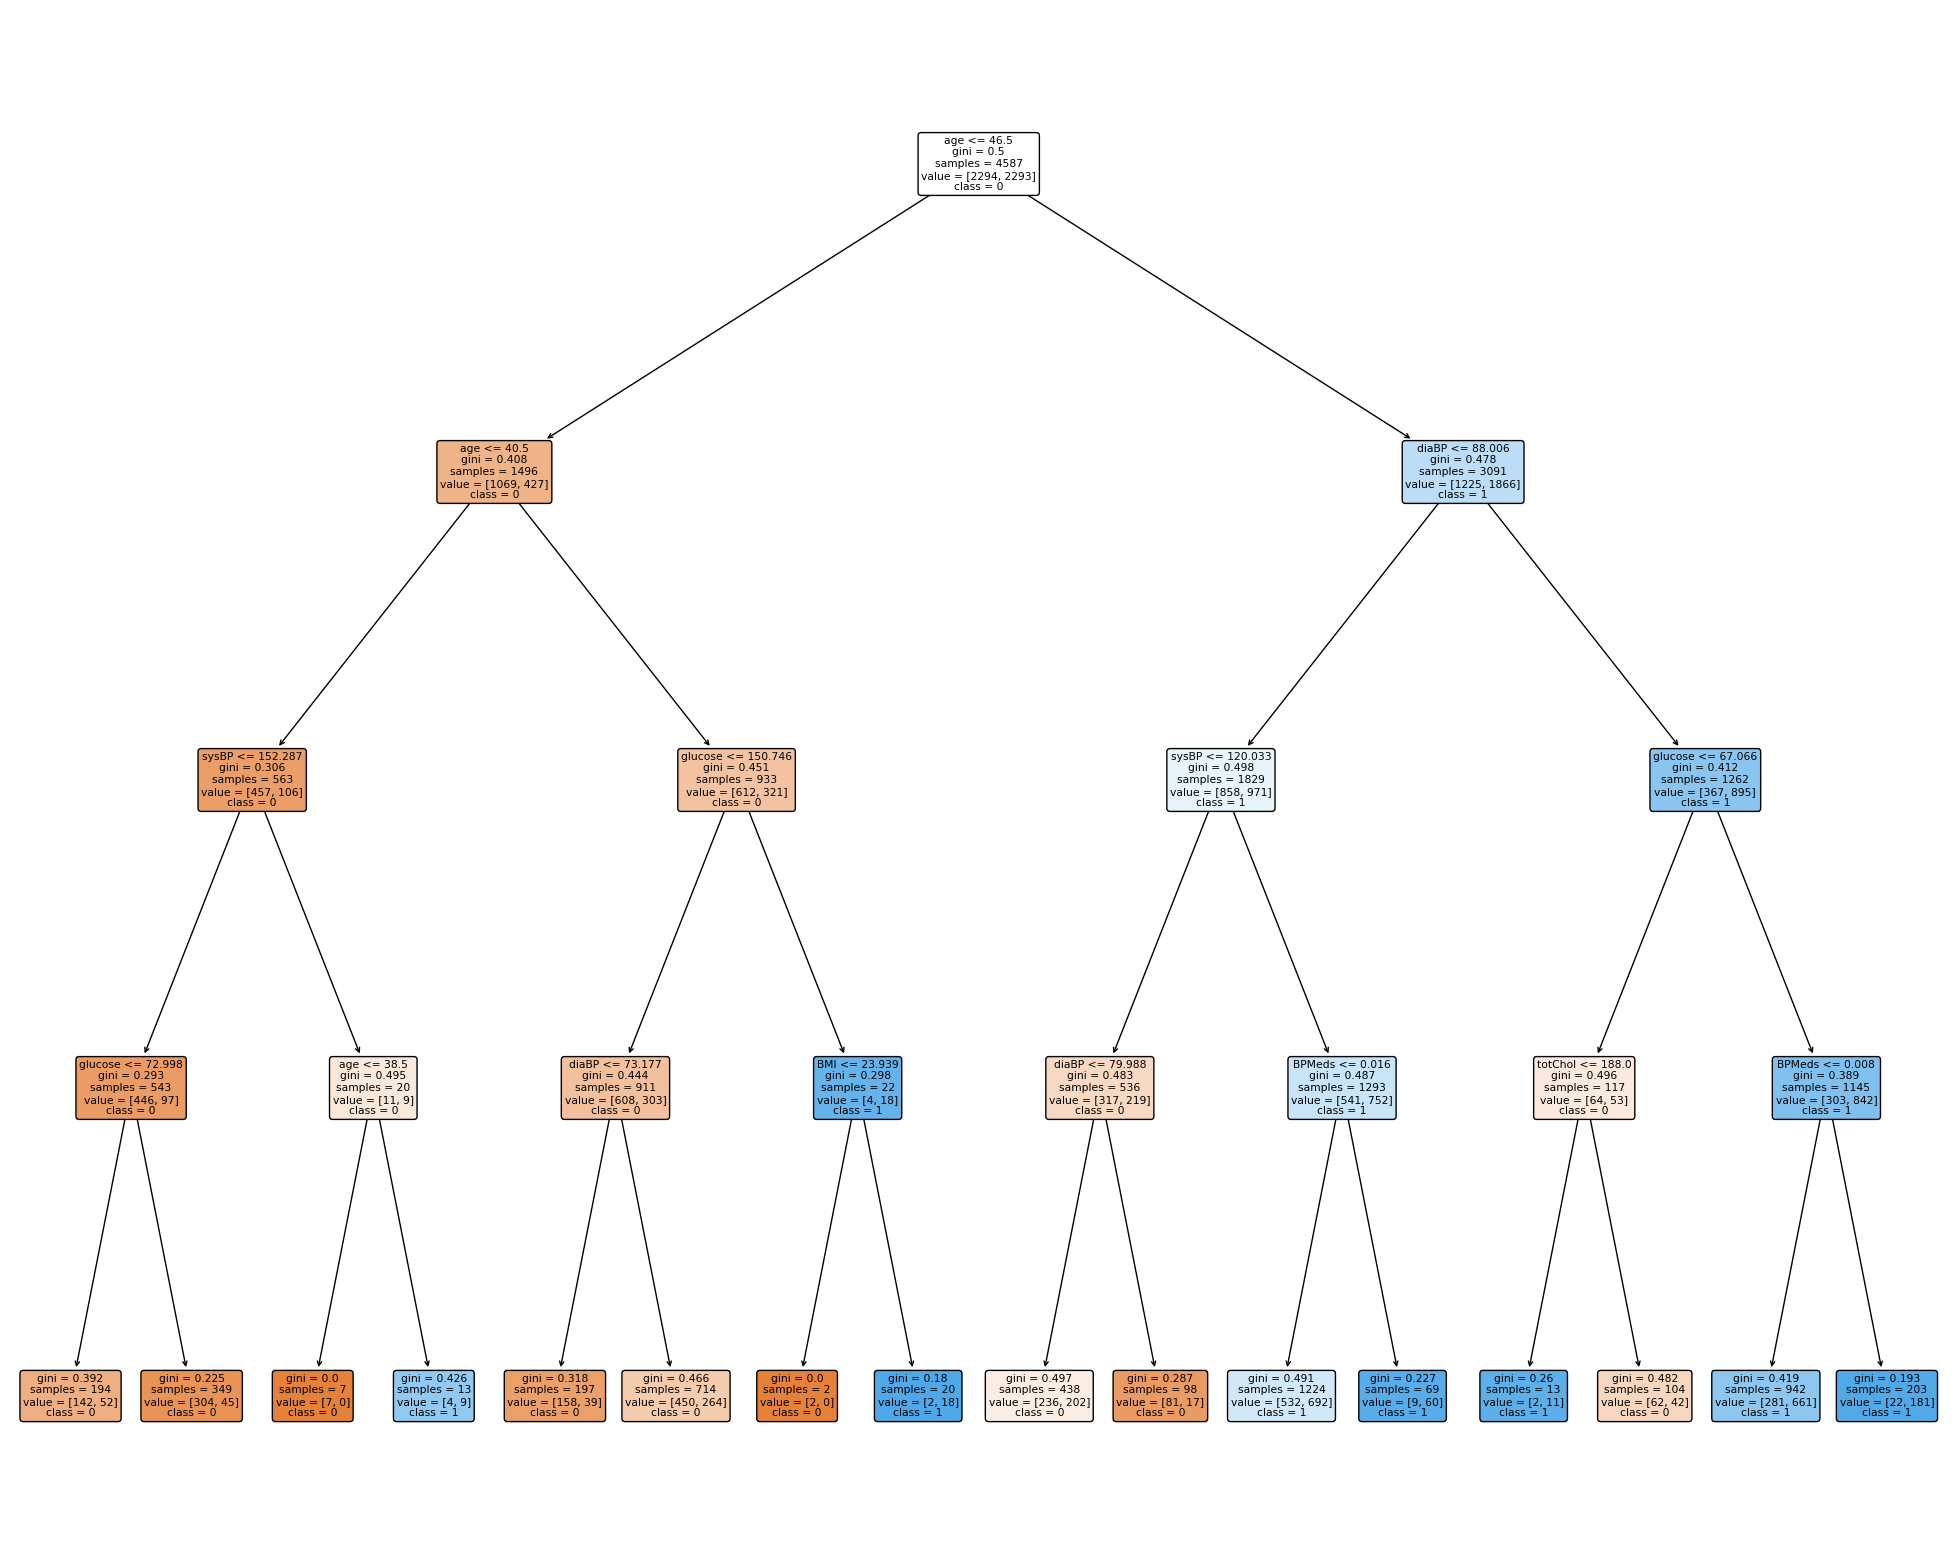

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, feature_names=list(x_new.columns), class_names=['0', '1'], filled=True, rounded=True)

In [ ]:
# Confusion matrix
metrics.confusion_matrix(y_test_new, y_predict)

array([[462, 302],
       [228, 537]])

*In the confusion matrix each row/column corresponds to the class we want to clasify, where rows correspond to actual values and columns predicted values. This gives us the number of true positives, true negatives, false positives and false negatives. For example for class 1 the number of tue positives is 462, the number of true negatives is 537, the number of false positives is 228 and the number of false negatives is 302.*